# Deep Learning Advanced Concepts with TensorFlow


## Introduction to Deep Learning Advanced Concepts
Welcome to the "Deep Learning Advanced Concepts with TensorFlow" notebook. In this notebook, we'll dive deeper into the world of deep learning, exploring concepts like parameters, layer dimensions, Convolutional Neural Networks (CNNs), and transfer learning. These concepts are essential for building and training complex deep learning models that excel in various tasks.



## Table of Contents

1. **Understanding Parameters and Layer Dimensions**
2. **Convolutional Neural Networks (CNNs)**
3. **Transfer Learning: Leveraging Pre-trained Models**

Let's embark on this journey to advance your knowledge in deep learning!

## 1. Understanding Parameters and Layer Dimensions


In deep learning, understanding the parameters and dimensions of each layer in your model is crucial. Parameters are the values learned during training that influence the model's predictions. The number of parameters in a layer depends on the number of neurons and connections in that layer.

Let's illustrate this with binary classification model we create for the circle dataset:

In [1]:
# import tensorflow
import tensorflow as tf

# Let's use the classification model from last class
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(2,)),  # relu activation
    tf.keras.layers.Dense(10, activation='relu'),  # relu activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation
])

# Print the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In this example, the model summary indicates that the first hidden layer has 300 parameters (input shape 2 * 100), the second hidden layer has 1010 parameters (input shape 100 * 10), and the output layer has 11 parameters (input shape 10 * 1). The total number of parameters in the entire model is 1,321.

Understanding these parameters helps you comprehend the complexity of your model and assess the potential for overfitting. Properly configuring layer dimensions ensures compatibility between layers and enables information flow through the network.

Let's test the same thing for a categorical classification

In [2]:
# Create a sequential model for categorical classification
model_categorical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10,)),  # First hidden layer with relu activation
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer with relu activation
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with softmax activation for 3 classes
])

# Print the summary of the categorical classification model
model_categorical.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9,859
Trainable params: 9,859
Non-trainable params: 0
_________________________________________________________________


In this example, we're building a model for categorical classification with **`3`** classes. The first hidden layer has **`128`** neurons, and the input shape is (**`10,)`**, which indicates a feature vector with 10 dimensions. The second hidden layer has **`64`** neurons. The output layer uses the softmax activation function, which is suitable for multi-class classification tasks. The output layer has **`3`** neurons, corresponding to the **`3`** classes.

The model summary will provide details about the number of parameters in each layer, the output shapes, and the total number of trainable parameters.

Remember that in categorical classification, the number of neurons in the output layer should match the number of classes, and the activation function should be softmax to ensure that the predicted probabilities sum up to 1 across all classes.

### Pro Tips

In deep learning, grasping the intricacies of parameters and layer dimensions is essential for building effective models. Here are some "Pro Tips" to enhance your understanding and practice:

1. **Keep It Manageable:**
  
  While deeper models can capture more complex patterns, they also introduce more parameters, increasing the risk of overfitting. Strive for a balance between model complexity and the size of your dataset.

2. **Visualize Your Model:**

  Tools like `model.summary()` provide valuable insights, but visualizing your model architecture using libraries like `plot_model` from Keras can offer a clearer picture of layer dimensions and connections.

3. **Experiment with Layer Configurations:**

  Altering the number of neurons and layers can impact the model's performance. Experiment with different configurations to observe their effects on accuracy and convergence.

4. **Regularly Review Parameters:**

  As your models evolve, revisit the number of parameters in each layer. Keeping an eye on parameter counts can help you maintain a manageable and effective architecture.

5. **Stay Curious:**
  
  Deep learning is an evolving field. Stay curious, explore new architectures, and continuously seek out the latest research and techniques to refine your models.

With these pro tips in mind, you'll be better equipped to navigate the intricacies of parameters and layer dimensions, leading to more informed decisions in your deep learning journey.







## 2. Deep Learning Techniques: Convolutional Neural Networks (CNNs)


Convolutional Neural Networks (CNNs) are a powerful architecture for tasks involving images and spatial data. They are designed to automatically learn and represent hierarchical patterns present in images. CNNs consist of convolutional layers, pooling layers, and fully connected layers.

In this section, we will explore how to construct and train a CNN using TensorFlow for tasks like image classification.


### Cats Vs Dogs

From this section onwards we will use the cats_vs._dogs dataset

![](https://storage.googleapis.com/tfds-data/visualization/fig/cats_vs_dogs-4.0.0.png)

In [3]:
import tensorflow_datasets as tfds

# Load the "cats_vs_dogs" dataset from TensorFlow Datasets
dataset_name = "cats_vs_dogs"
(ds_train, ds_test) = tfds.load(
    dataset_name,
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
)


In [4]:
# Preprocess and resize images
def preprocess_image(image, label):
    image = tf.image.resize(image, (128, 128))  # Resize images to a common size
    return image, label

# Apply preprocessing and batching to the training dataset
ds_train = ds_train.map(preprocess_image).batch(32)
ds_test = ds_test.map(preprocess_image).batch(32)

### Normal Fully Connected Model (Dense Model) For Comparison

In [5]:
# Build a dense model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128, 3)),  # Flattening the data
    tf.keras.layers.Dense(1000, activation='relu'),  # relu activation
    tf.keras.layers.Dense(100, activation='relu'),  # relu activation
    tf.keras.layers.Dense(100, activation='relu'),  # relu activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense_6 (Dense)             (None, 1000)              49153000  
                                                                 
 dense_7 (Dense)             (None, 100)               100100    
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 49,263,301
Trainable params: 49,263,301
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the sigmoid model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

# Train the model
model.fit(ds_train, validation_data=ds_test, epochs=5)

Epoch 1/5
582/582 [==============================] - 45s 72ms/step - loss: nan - accuracy: 0.5046 - val_loss: nan - val_accuracy: 0.4901
Epoch 2/5
582/582 [==============================] - 32s 54ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 3/5
582/582 [==============================] - 29s 50ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 4/5
582/582 [==============================] - 29s 50ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 5/5
582/582 [==============================] - 33s 56ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901


### Bulid the CNN Model

The CNN Model Inspired from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/#article-convolution) Project.

In [7]:
# Build a CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),  # Pooling layer

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),  # Convolutional layer
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),  # Convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),  # Pooling layer

    tf.keras.layers.Flatten(),  # Flatten layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                  

In [8]:
# Compile the CNN model
cnn_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [9]:
cnn_model.fit(ds_train, validation_data=ds_test, epochs = 5)

Epoch 1/5
582/582 [==============================] - 36s 53ms/step - loss: 1.1410 - accuracy: 0.5172 - val_loss: 0.6908 - val_accuracy: 0.5245
Epoch 2/5
582/582 [==============================] - 30s 51ms/step - loss: 0.6830 - accuracy: 0.5548 - val_loss: 0.6904 - val_accuracy: 0.5419
Epoch 3/5
582/582 [==============================] - 30s 52ms/step - loss: 0.6758 - accuracy: 0.5689 - val_loss: 0.6905 - val_accuracy: 0.5503
Epoch 4/5
582/582 [==============================] - 32s 54ms/step - loss: 0.6676 - accuracy: 0.5783 - val_loss: 0.6847 - val_accuracy: 0.5598
Epoch 5/5
582/582 [==============================] - 30s 51ms/step - loss: 0.6510 - accuracy: 0.6016 - val_loss: 0.6999 - val_accuracy: 0.5662


## 3. Transfer Learning: Leveraging Pre-trained Models
Transfer learning is a technique that leverages knowledge learned from one task and applies it to another related task. This is particularly useful when dealing with limited data or computational resources. By using pre-trained models, you can benefit from features learned on massive datasets and fine-tune the model for your specific task.

We will cover how to use transfer learning with TensorFlow's Keras API, utilizing pre-trained models like VGG, ResNet, or MobileNet for your projects.

In [10]:
# Import required libraries for transfer learning
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new sequential model
transfer_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
# Compile the model
transfer_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Train the model
transfer_model.fit(ds_train, validation_data= ds_test, epochs=5)

Epoch 1/5
582/582 [==============================] - 43s 67ms/step - loss: 0.7378 - accuracy: 0.9127 - val_loss: 0.1505 - val_accuracy: 0.9433
Epoch 2/5
582/582 [==============================] - 35s 60ms/step - loss: 0.1044 - accuracy: 0.9588 - val_loss: 0.1522 - val_accuracy: 0.9450
Epoch 3/5
582/582 [==============================] - 34s 58ms/step - loss: 0.0687 - accuracy: 0.9737 - val_loss: 0.2000 - val_accuracy: 0.9428
Epoch 4/5
582/582 [==============================] - 34s 57ms/step - loss: 0.0548 - accuracy: 0.9783 - val_loss: 0.2283 - val_accuracy: 0.9422
Epoch 5/5
582/582 [==============================] - 34s 59ms/step - loss: 0.0473 - accuracy: 0.9805 - val_loss: 0.2508 - val_accuracy: 0.9402


In [12]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# Define a function to preprocess and resize the image
def preprocess_and_resize_image(image_path):
    response = requests.get(image_path)
    image = Image.open(BytesIO(response.content))
    image = image.resize((128, 128))
    image = np.expand_dims(image, axis=0)

    return image

In [13]:
cat_image = preprocess_and_resize_image("https://th-thumbnailer.cdn-si-edu.com/bZAar59Bdm95b057iESytYmmAjI=/1400x1050/filters:focal(594x274:595x275)/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/95/db/95db799b-fddf-4fde-91f3-77024442b92d/egypt_kitty_social.jpg")

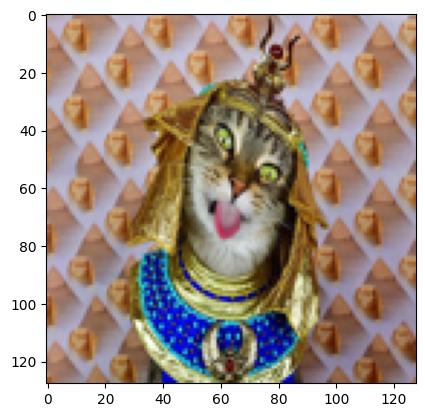

In [14]:
plt.imshow(cat_image[0])

In [15]:
transfer_model.predict(cat_image)

1/1 [==============================] - 1s 584ms/step


array([[0.8929369]], dtype=float32)

In [16]:
dog_image = preprocess_and_resize_image("https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg")

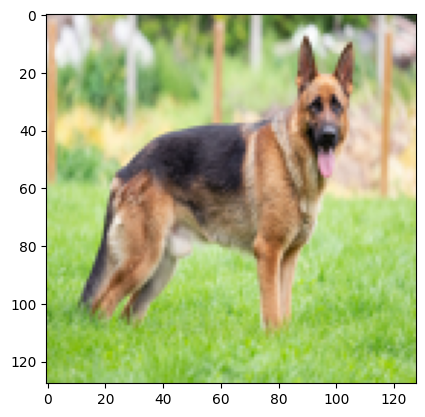

In [17]:
plt.imshow(dog_image[0])

In [18]:
transfer_model.predict(dog_image)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)